In [61]:
from datetime import date
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rcParams
import seaborn as sns
import random
import functions.jtsfx as jts

In [62]:
class Reed :
   
   colors = {
      "R" : "Red",
      "B" : "Blue",
      "PU" : "Purple",
      "PI" : "Pink",
      "HAL" : "Halloween",
      "BER" : "Berry",
      "MIN" : "Mint"
   }
   staples = {
      "EB" : "E-Brass",
      "OB" : "O-Brass",
      "HC" : "Hard Cork",
      "SC" : "Soft Cork"
   }
   
   def __init__ (self,      color , staple,    len_init_mm,   year,mo,day):
      """ 
      ======================================================
      INPUT
         >>> color      from :
                           "R" Red  "B" Blue "PU" Purple
                           "PI" Pink    "HAL" Halloween
                           "BER" Berry  "MIN" Mint
         >>> staple     from :
                           "OB" O-Brass   "EB" E-Brass
                           "SC" Soft Cork "HC" Hard Cork
         >>> initial Len      float
         >>> date    --> day, month, year
         
      ======================================================
      """
      self.color   = Reed.colors[color]
      self.staple   = Reed.staples[staple]

      self.datemade     =  date(year,mo,day)   
      self.lenInitial   =  len_init_mm
      self.pitchscores  =  []
      self.respscores   =  []
      self.resoscores   =  []
      
      self.isAlive = True
      
   @property
   def pitch (self):
      return sum(self.pitchscores)/len(self.pitchscores)
   @property
   def response (self):
      return sum(self.respscores)/len(self.respscores)
   @property
   def resonance (self):
      return sum(self.resoscores)/len(self.resoscores)
   @property
   def lifespan (self):
      if self.isAlive == True:
         return (date.today() - self.datemade).days
      
   def __repr__ (self):
      c = self.color
      li = self.lenInitial
      d = f'{self.datemade.month}/{self.datemade.day}'
      return f'[[ REED {d} | {c} | ({li}mm) ]]'
   
   def rec (self, pitch, resp, reso):
      self.pitchscores.append(pitch)
      self.respscores.append(resp)
      self.resoscores.append(reso)
      scores = [ round(sum(x) / len(x),1) for x in [self.pitchscores, self.respscores, self.resoscores]]
      return scores
   
   @property
   def asdict (self):
      return {
         "name" : f'Reed {self.datemade.month}/{self.datemade.day}',
         "color" : self.color ,
         "len_init" : self.lenInitial,
         "date made" : self.datemade,
         "life" : self.lifespan
      }
   
class ReedCase :
   def __init__ (self, caseName):
      self.name = caseName
      self.reeds = []
   
   @property
   def df (self):
      return pd.DataFrame([r.asdict for r in self.reeds])
      
   def newReed (self,      color , staple,    len_init_mm,   year,mo,day):
      """ 
      ======================================================
      INPUT
         >>> color      from :
                           "R" Red  "B" Blue "PU" Purple
                           "PI" Pink    "HAL" Halloween
                           "BER" Berry  "MIN" Mint
         >>> staple     from :
                           "OB" O-Brass   "EB" E-Brass
                           "SC" Soft Cork "HC" Hard Cork
         >>> initial Len      float
         >>> date    --> day, month, year
         
      ======================================================
      """
      reed = Reed (color, staple, len_init_mm, year,mo,day)
      self.reeds.append(reed)
      return reed
   
   @property
   def initLenAverage (self):
      return round(self.df.len_init.mean(),3)

In [63]:
def makeRandomReed (case):
   case.newReed (
      random.choice(list(Reed.colors.keys())),
      random.choice(list(Reed.staples.keys())),
      random.randint(697,730) / 10,
      2022,
      random.randint(1,5),
      random.randint(1,28)
   )

In [64]:
JTS = ReedCase("Josh's Reeds")

JTS.newReed("PI", "OB",    72.3,    2022,5,4)
JTS.newReed("MIN","SC",    72,      2022,5,4)
JTS.newReed("B",  "EB",    71.8,    2022,5,7)
JTS.newReed("BER","EB",    71.1,    2022,5,15)
for x in range(40):
   makeRandomReed(JTS)

JTS.df.describe().style.format("{:.3g}")

,len_init,life
count,44,44
mean,71.3,54.6
std,0.924,45.7
min,69.7,-10
25%,70.4,10
50%,71.4,57
75%,72,89.5
max,72.9,136


In [65]:
print(
    "INITIAL LENGTH (MEAN):", JTS.initLenAverage
    )

INITIAL LENGTH (MEAN): 71.307


In [66]:
JTS.df.sort_values('date made')
JTS.df['date made'] = JTS.df['date made'].astype('datetime64')

Text(0.5, 0, '$Length_{initial} ~ (mm)$')

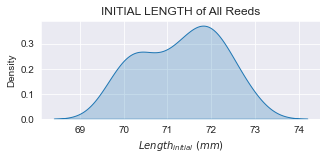

In [67]:
jts.snsFigSize(5,1.8)
sns.kdeplot (x="len_init",data=JTS.df,shade=True)
plt.title("INITIAL LENGTH of All Reeds")
plt.xlabel("$Length_{initial} ~ (mm)$")


Text(0.5, 0, '$days$')

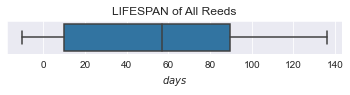

In [68]:
jts.snsFigSize(6,0.6)
sns.boxplot (x="life",data=JTS.df)
plt.title("LIFESPAN of All Reeds")
plt.xlabel("$days$")

In [69]:
df_dummies = pd.get_dummies(JTS.df['color'])
del df_dummies[df_dummies.columns[-1]]
df_new = pd.concat([JTS.df, df_dummies], axis=1)
del df_new['color']
corel = df_new.corr().iloc[2:,0:2]
corel

,len_init,life
Berry,0.092823,0.106138
Blue,0.044362,0.257083
Halloween,0.051719,-0.193760
Mint,-0.151792,-0.128890
Pink,-0.002965,0.009464
Purple,-0.251510,0.102676


Text(0.5, 1.0, 'Correlations with Color')

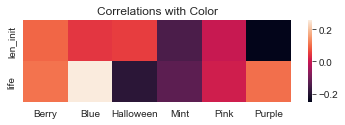

In [70]:
jts.snsFigSize(6,1.5)
sns.heatmap(corel.T)
plt.title("Correlations with Color")

In [71]:
len_vs_color = [ (round(df[df['color'] == x]['len_init'].mean(),2), x) for x in list(Reed.colors.values())]
df_len_color = pd.DataFrame(len_vs_color,columns=["length_mm","color"])
df_len_color

,length_mm,color
0,71.79,Red
1,71.90,Blue
2,71.03,Purple
3,71.51,Pink
4,71.55,Halloween
5,71.33,Berry
6,71.80,Mint


In [72]:
REED_PALETTE = ['tomato','cornflowerblue','mediumpurple','pink','orange','orchid','palegreen']

Text(0, 0.5, '$len_{init} ~(mm)$')

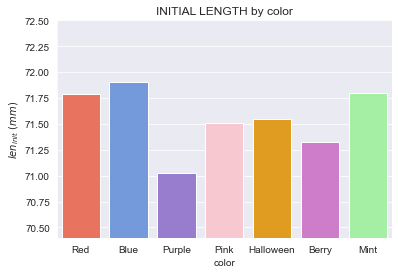

In [73]:
jts.snsFigSize (6,4)
fig, ax = plt.subplots()
ax.set_ylim(70.4,72.5)
sns.set_style('darkgrid')
plt.title("INITIAL LENGTH by color")

sns.barplot(y='length_mm',x='color',data=df_len_color, palette= REED_PALETTE)
plt.ylabel("$len_{init} ~(mm)$")